In [1]:
# ensemble learning methods :  combining multiple models to make a stronger model 


import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




In [17]:
# load the data 
X,y  = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Convert to Dmatrix 

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, y_test)

#train the model 

params = {
    "objective": "binary:logistic",
   'eval_metric': 'logloss',
    "max_depth":2,
    "eta":0.05
}

model = xgb.train(params,dtrain, num_boost_round=50)

#predict 
y_pred_prob = model.predict(dtest)
y_pred = (y_pred_prob>0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


In [18]:
# lets cross check whether model is overfitted or underfitted or generalized 


# checking whether model is overfitted or underfitted 

#evaluate on trainig data

y_pred_prob = model.predict(dtest)
y_pred = (y_pred_prob>0.5).astype(int)

print("Accuracy of test data :", accuracy_score(y_test, y_pred))


y_train_pred_prob = model.predict(dtrain)
y_train_pred = (y_train_pred_prob>0.5).astype(int)

print("Accuracy of train data :", accuracy_score(y_train, y_train_pred))

Accuracy of test data : 0.9649122807017544
Accuracy of train data : 0.9846153846153847


In [19]:
cv_results = xgb.cv(
    params, dtrain, num_boost_round=200,
    nfold=5, early_stopping_rounds=10, metrics="logloss", as_pandas=True
)

print(cv_results)

     train-logloss-mean  train-logloss-std  test-logloss-mean  \
0              0.611904           0.004181           0.616326   
1              0.576563           0.004382           0.583872   
2              0.544670           0.004535           0.554771   
3              0.515799           0.004567           0.529397   
4              0.489569           0.004572           0.506061   
..                  ...                ...                ...   
195            0.022142           0.001534           0.109064   
196            0.021986           0.001517           0.109012   
197            0.021836           0.001506           0.108790   
198            0.021683           0.001496           0.108759   
199            0.021545           0.001494           0.108505   

     test-logloss-std  
0            0.015082  
1            0.013985  
2            0.013682  
3            0.015428  
4            0.015822  
..                ...  
195          0.034464  
196          0.034407  
197

In [20]:
best_round = cv_results['test-logloss-mean'].idxmin()
best_test_logloss = cv_results.loc[best_round, 'test-logloss-mean']

print(f"✅ Best Boosting Round: {best_round}")
print(f"🧠 Best Test Log Loss: {best_test_logloss}")


✅ Best Boosting Round: 199
🧠 Best Test Log Loss: 0.10850470069300762


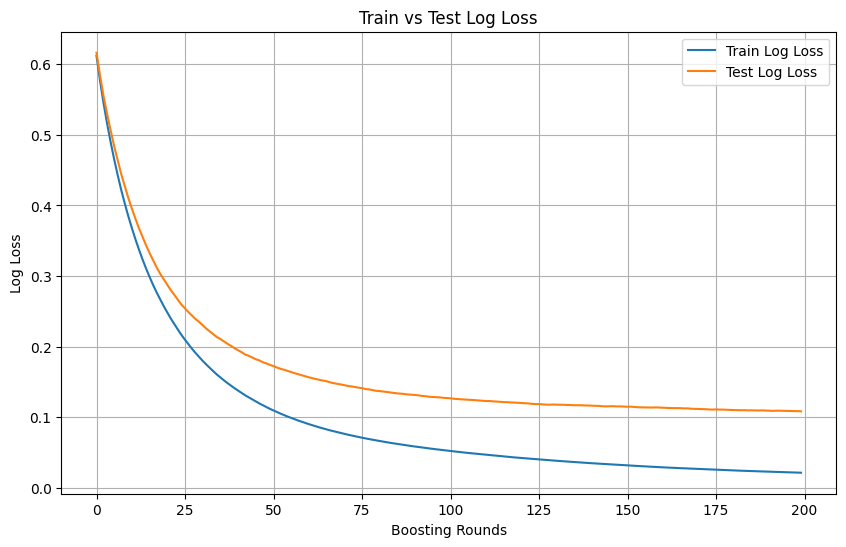

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cv_results['train-logloss-mean'], label='Train Log Loss')
plt.plot(cv_results['test-logloss-mean'], label='Test Log Loss')
plt.xlabel('Boosting Rounds')
plt.ylabel('Log Loss')
plt.title('Train vs Test Log Loss')
plt.legend()
plt.grid(True)
plt.show()
